In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('data/data_final.csv', 
                    parse_dates=['DateTime'])
df['DateTime'] = df['DateTime'].astype('datetime64[s]')
display(df.head())

print(f"Number of entries: {len(df)}")

,DateTime,pod1,pod2
0,2021-07-12 08:09:40,471740416,456708096.0
1,2021-07-12 08:09:50,471740416,456708096.0
2,2021-07-12 08:10:00,471740416,456708096.0
3,2021-07-12 08:10:10,321187840,408166400.0
4,2021-07-12 08:10:21,321187840,408166400.0


Number of entries: 17058


In [45]:
df_pod1 = df.copy()
df_pod1.drop('pod2', inplace=True, axis=1)
df_pod1 = df_pod1.rename(columns={'DateTime': 'ds', 'pod1': 'y'})
df_pod1['ds'] = df_pod1['ds'].astype('datetime64[s]')
display(df_pod1.head())

df_pod2 = df.copy()
df_pod2.drop('pod1', inplace=True, axis=1)
df_pod2 = df_pod2.rename(columns={'DateTime': 'ds', 'pod2': 'y'})
df_pod2['ds'] = df_pod2['ds'].astype('datetime64[s]')
display(df_pod2.head())

,ds,y
0,2021-07-12 08:09:40,471740416
1,2021-07-12 08:09:50,471740416
2,2021-07-12 08:10:00,471740416
3,2021-07-12 08:10:10,321187840
4,2021-07-12 08:10:21,321187840


,ds,y
0,2021-07-12 08:09:40,456708096.0
1,2021-07-12 08:09:50,456708096.0
2,2021-07-12 08:10:00,456708096.0
3,2021-07-12 08:10:10,408166400.0
4,2021-07-12 08:10:21,408166400.0


,y
ds,
2021-07-12 08:00:00,471740416
2021-07-12 08:30:00,335216640
2021-07-12 09:00:00,334589952
2021-07-12 09:30:00,341065728
2021-07-12 10:00:00,354226176


,y
ds,
2021-07-12 08:00:00,456708096.0
2021-07-12 08:30:00,351539200.0
2021-07-12 09:00:00,338595840.0
2021-07-12 09:30:00,349335552.0
2021-07-12 10:00:00,355250176.0


Length of downscaled data: 97


<AxesSubplot:title={'center':'Data for Prometheus'}, xlabel='ds'>

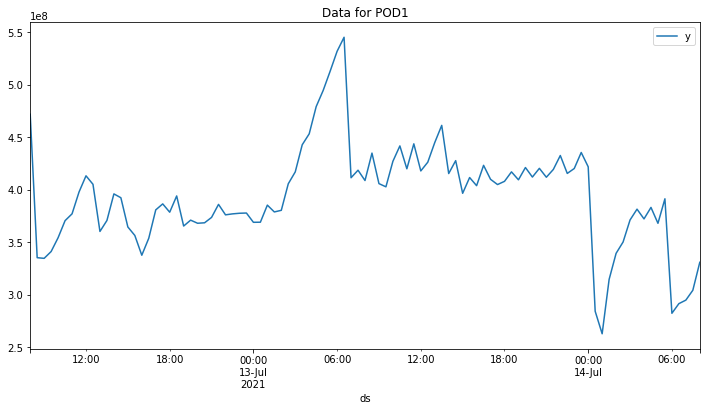

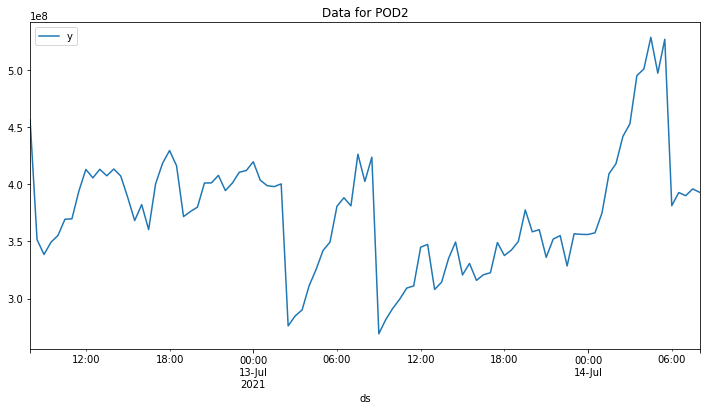

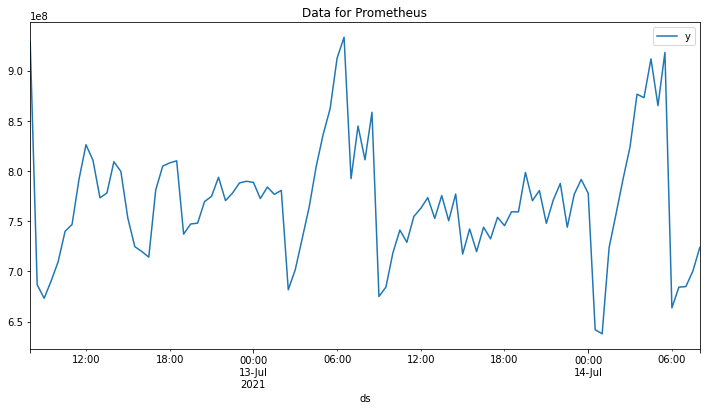

In [46]:
df_pod1 = df_pod1.set_index('ds')
df_pod1 = df_pod1.resample('30T').first()
df_pod1.plot(figsize=(12,6), title='Data for POD1')
display(df_pod1.head())

df_pod2 = df_pod2.set_index('ds')
df_pod2 = df_pod2.resample('30T').first()
df_pod2.plot(figsize=(12,6), title='Data for POD2')
display(df_pod2.head())

print(f"Length of downscaled data: {len(df_pod1)}")

dff = (df_pod1 + df_pod2)

dff.plot(figsize=(12,6), title='Data for Prometheus')

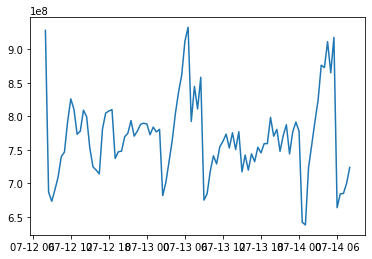

In [47]:
plt.plot(dff)

In [28]:
train = df_pod1.iloc[:5000]
test = df_pod1.iloc[5000:5100]

print(f"Length of training data: {len(train)}")

print(f"Length of test data: {len(test)}")

Length of training data: 5000
Length of test data: 100


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train)

train_scaled = scaler.transform(train)
# test_scaled = scaler.transform(test)

train_scaled.head()
# print(test_scaled[:10]

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [31]:
from pmdarima.arima import ADFTest

adf_test = ADFTest()

adf_test.should_diff(train_scaled)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

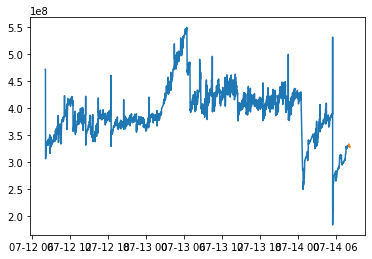

In [6]:
train = ts[:17000]
test = ts[17000:]
plt.plot(train)
plt.plot(test)

In [7]:
import pmdarima as pm

model = pm.auto_arima(train, start_p=1, d=1, start_q=1,
                      max_p=5, max_q=5, max_d=5,
                      start_P=0, start_Q=1, max_P=5, max_Q=5,
                      seasonal=True, trace=True, stationary=True,
                      n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=572915.230, Time=2.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=648834.282, Time=0.46 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=636765.173, Time=2.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=721240.546, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=572897.618, Time=9.87 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=2.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=572857.921, Time=3.48 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=572497.761, Time=9.25 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=5.88 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=572481.874, Time=16.08 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=3.16 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=572058.522, Time=22.23 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : 

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                17000
Model:               SARIMAX(4, 0, 5)   Log Likelihood             -285870.887
Date:                Wed, 14 Jul 2021   AIC                         571761.773
Time:                        09:10:07   BIC                         571839.183
Sample:                             0   HQIC                        571787.300
                              - 17000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9986      0.179      5.586      0.000       0.648       1.349
ar.L2          0.0092      0.193      0.048      0.962      -0.370       0.388
ar.L3          0.5190      0.085      6.104      0.000       0.352       0.686
ar.L4         -0.5269      0.006    -90.464      0.000      -0.538      -0.516
ma.L1         -0.0003      0.186     -0.002      0.999      -0.365       0.365
ma.L2         -0.0141      0.085     -0.165      0.869      -0.181       0.153
ma.L3         -0.7661      0.006   -120.239      0.000      -0.779      -0.754
ma.L4         -0.0004      0.091     -0.004      0.997      -0.178       0.177
ma.L5          0.0011      0.037      0.030      0.976      -0.071       0.073
sigma2      2.232e+13   3.63e-14   6.15e+26      0.000    2.23e+13    2.23e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):        1012724383.58
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.40   Skew:                           -18.89
Prob(H) (two-sided):                  0.00   Kurtosis:                      1198.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.66e+42. Standard errors may be unstable.
"""

In [9]:
len(test)

58

In [10]:
pred = model.predict(n_periods=58)

In [11]:
test.head()

DateTime
2021-07-14 08:03:35.701    331194368
2021-07-14 08:03:45.719    331419648
2021-07-14 08:03:55.777    331419648
2021-07-14 08:04:05.799    331419648
2021-07-14 08:04:15.828    331657216
Name: pod1, dtype: int64

In [12]:
test['Predictions'] = pred
test.head()

DateTime
2021-07-14 08:03:35.701000    331194368
2021-07-14 08:03:45.719000    331419648
2021-07-14 08:03:55.777000    331419648
2021-07-14 08:04:05.799000    331419648
2021-07-14 08:04:15.828000    331657216
Name: pod1, dtype: object

In [13]:
test.plot(figsize=(12,6))

TypeError: no numeric data to plot

In [17]:
ts_log = np.log(ts)

In [18]:
rolling_mean = ts.rolling(window=18).mean()
rolling_std = ts.rolling(window=18).std()

print(rolling_mean, rolling_std)

DateTime
2021-07-07 10:52:00.238             NaN
2021-07-07 10:52:10.259             NaN
2021-07-07 10:52:20.277             NaN
2021-07-07 10:52:30.298             NaN
2021-07-07 10:52:40.317             NaN
                               ...     
2021-07-07 12:30:10.446    3.386079e+08
2021-07-07 12:30:20.460    3.384764e+08
2021-07-07 12:30:30.517    3.380766e+08
2021-07-07 12:30:40.574    3.376767e+08
2021-07-07 12:30:50.587    3.372769e+08
Name: MemoryUsage, Length: 593, dtype: float64 DateTime
2021-07-07 10:52:00.238             NaN
2021-07-07 10:52:10.259             NaN
2021-07-07 10:52:20.277             NaN
2021-07-07 10:52:30.298             NaN
2021-07-07 10:52:40.317             NaN
                               ...     
2021-07-07 12:30:10.446    6.060865e+06
2021-07-07 12:30:20.460    5.924836e+06
2021-07-07 12:30:30.517    6.006375e+06
2021-07-07 12:30:40.574    6.058951e+06
2021-07-07 12:30:50.587    6.083315e+06
Name: MemoryUsage, Length: 593, dtype: float64


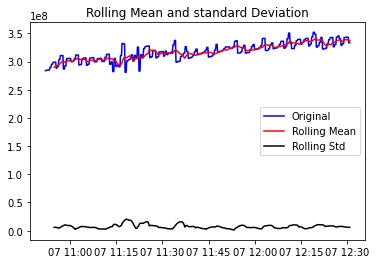

In [19]:
orig = plt.plot(ts, color='blue', label='Original')
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
std = plt.plot(rolling_std, color='black', label='Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean and standard Deviation')
plt.show(block=False)

In [21]:
from statsmodels.tsa.stattools import adfuller

print('Dickey-Fuller Results')
dftest = adfuller(ts_log, autolag='AIC')

dfop = pd.Series(dftest[0:4], index=['Test-Statistic', 'P-value', 'No. of lags used', 'No. of observations used'])

for key, value in dftest[4].items():
    dfop['Critical Value (%s)'%key] = value
    
print(dfop)

Dickey-Fuller Results
Test-Statistic               -1.559982
P-value                       0.503658
No. of lags used             18.000000
No. of observations used    574.000000
Critical Value (1%)          -3.441794
Critical Value (5%)          -2.866588
Critical Value (10%)         -2.569459
dtype: float64


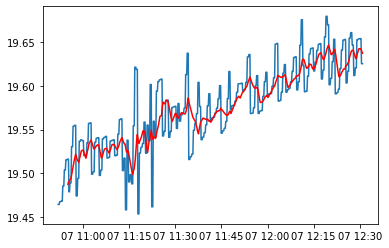

In [22]:
rolling_mean_log = ts_log.rolling(window=20).mean()
rolling_std_log = ts_log.rolling(window=20).std()

plt.plot(ts_log)
plt.plot(rolling_mean_log, color='red')

# print(rolling_mean, rolling_std)

In [35]:
log_rolavg = ts_log - rolling_mean_log
log_rolavg.head()

log_rolavg.dropna(inplace=True)
log_rolavg.head()

DateTime
2021-07-07 10:55:10.656    0.028834
2021-07-07 10:55:20.676    0.026247
2021-07-07 10:55:30.696   -0.011808
2021-07-07 10:55:40.707   -0.012529
2021-07-07 10:55:50.727   -0.003418
Name: MemoryUsage, dtype: float64

In [36]:
def test_stationarity(timeseries):
    ma = timeseries.rolling(window=20).mean()
    ms = timeseries.rolling(window=20).std()
    
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(ma, color='red', label='Rolling Mean')
    std = plt.plot(ms, color='black', label='Rolling Std')

    plt.legend(loc='best')
    plt.title('Rolling Mean and standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Results')
    dftest = adfuller(timeseries, autolag='AIC')
    dfop = pd.Series(dftest[0:4], index=['Test-Statistic', 'P-value', 'No. of lags used', 'No. of observations used'])
    for key, value in dftest[4].items():
        dfop['Critical Value (%s)'%key] = value

    print(dfop)

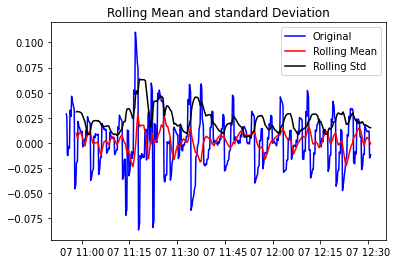

Dickey-Fuller Results
Test-Statistic             -6.768229e+00
P-value                     2.682927e-09
No. of lags used            1.800000e+01
No. of observations used    5.550000e+02
Critical Value (1%)        -3.442187e+00
Critical Value (5%)        -2.866762e+00
Critical Value (10%)       -2.569551e+00
dtype: float64


In [37]:
test_stationarity(log_rolavg)

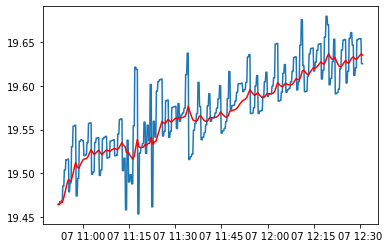

In [38]:
expdecaywa = ts_log.ewm(halflife=20, min_periods=0, adjust=True).mean()
plt.plot(ts_log)
plt.plot(expdecaywa, color='red')

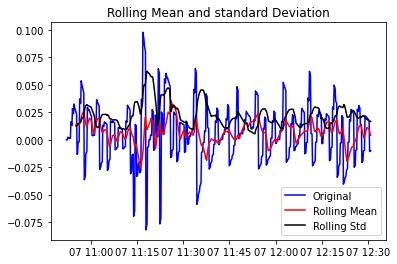

Dickey-Fuller Results
Test-Statistic               -5.422379
P-value                       0.000003
No. of lags used             18.000000
No. of observations used    574.000000
Critical Value (1%)          -3.441794
Critical Value (5%)          -2.866588
Critical Value (10%)         -2.569459
dtype: float64


In [39]:
dsexpdecaywa = ts_log - expdecaywa
test_stationarity(dsexpdecaywa)

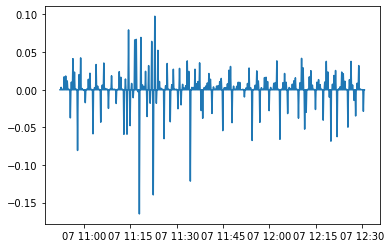

In [40]:
datasetshift = ts_log - ts_log.shift()
plt.plot(datasetshift)

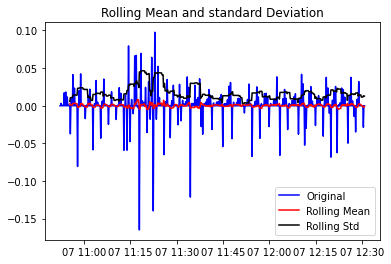

Dickey-Fuller Results
Test-Statistic             -9.634341e+00
P-value                     1.581239e-16
No. of lags used            1.700000e+01
No. of observations used    5.740000e+02
Critical Value (1%)        -3.441794e+00
Critical Value (5%)        -2.866588e+00
Critical Value (10%)       -2.569459e+00
dtype: float64


In [41]:
datasetshift.dropna(inplace=True)
test_stationarity(datasetshift)

/home/harith/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


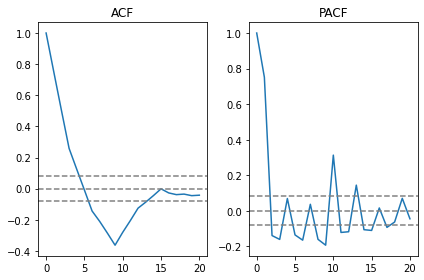

In [42]:
from statsmodels.tsa.stattools import acf, pacf
    
lag_acf = acf(log_rolavg, nlags=20)
lag_pacf = pacf(log_rolavg, nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_rolavg)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_rolavg)), linestyle='--', color='gray')
plt.title('ACF')


plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_rolavg)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_rolavg)), linestyle='--', color='gray')
plt.title('PACF')
plt.tight_layout()

/home/harith/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/harith/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore',

Text(0.5, 1.0, 'RSS: nan')

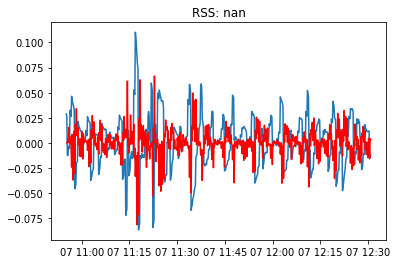

In [45]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(log_rolavg, order=(2, 1, 5))
results = model.fit(disp=-1)
plt.plot(log_rolavg)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-log_rolavg)**2))


In [46]:
pred_arima_diff = pd.Series(results.fittedvalues, copy=True)
print(pred_arima_diff.head())

DateTime
2021-07-07 10:55:20.676   -0.000003
2021-07-07 10:55:30.696    0.000325
2021-07-07 10:55:40.707    0.004362
2021-07-07 10:55:50.727    0.000684
2021-07-07 10:56:00.746    0.015374
dtype: float64


In [47]:
pred_arima_diff_cumsum = pred_arima_diff.cumsum()
print(pred_arima_diff_cumsum.head())

DateTime
2021-07-07 10:55:20.676   -0.000003
2021-07-07 10:55:30.696    0.000322
2021-07-07 10:55:40.707    0.004684
2021-07-07 10:55:50.727    0.005369
2021-07-07 10:56:00.746    0.020743
dtype: float64


In [48]:
pred_arima_log = pd.Series(ts_log)
pred_arima_log = pred_arima_log.add(pred_arima_diff_cumsum, fill_value=0)
pred_arima_log.head()

DateTime
2021-07-07 10:52:00.238    19.464558
2021-07-07 10:52:10.259    19.464558
2021-07-07 10:52:20.277    19.464558
2021-07-07 10:52:30.298    19.467726
2021-07-07 10:52:40.317    19.467726
dtype: float64

/home/harith/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


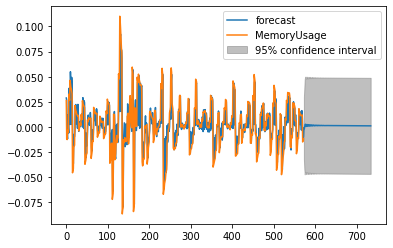

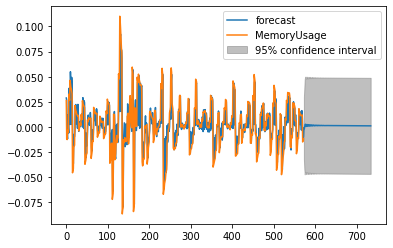

In [50]:
results.plot_predict(1,735)

In [59]:
res = results.forecast(steps=10)

In [64]:
res[1]

array([0.01563515, 0.02040128, 0.02415102, 0.02415233, 0.02419982,
       0.02420018, 0.02422617, 0.02422953, 0.02425747, 0.02425864])

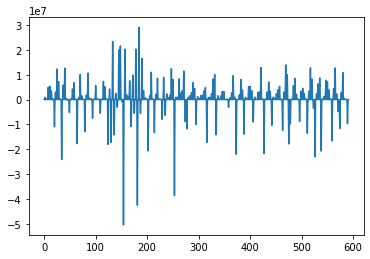

In [58]:
diff = list()
X = data.values
for i in range(1, len(data)):
	value = X[i] - X[i - 1]
	diff.append(value)
plt.plot(diff)
plt.show()